<a href="https://colab.research.google.com/github/siddevkota/Web-Scrape/blob/main/bs4_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping Highest-Rated Anime Series from IMDb**
---

## Importing Libraries

In [243]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from wordcloud import WordCloud
import networkx as nx
import numpy as np

### Starting Scraping Process

scraping **Highest-Rated Anime Series** from **IMDb** 


---



In [244]:
url = "https://www.imdb.com/list/ls033398199/"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.5',
    'Accept-Encoding': 'gzip, deflate, br',
    'Referer': 'https://www.google.com/',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1'
}
response = requests.get(url, headers=headers)

In [245]:
soup = BeautifulSoup(response.text, 'html.parser')

In [246]:
print(soup.prettify())

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
  <script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}}}})(ue_csm);


    var ue_err_chan = 'jserr';
(function(d,e){function h(f,b){if(!(a.ec>a.mxe)&&f){a.ter.push(f);b=b||{};var c=f.logLevel||b.logLevel;c&&c!==k&&c!==m&&c!==n&&c!==p||a.ec++;c&&c!=k||a.ec

In [247]:
animes = soup.find_all('div', class_="lister-item mode-detail")

In [248]:
animes

[<div class="lister-item mode-detail">
 <div class="lister-item-image ribbonize" data-tconst="tt1355642">
 <a href="/title/tt1355642/?ref_=ttls_li_i"> <img alt="Fullmetal Alchemist: Brotherhood" class="loadlate" data-tconst="tt1355642" height="209" loadlate="https://m.media-amazon.com/images/M/MV5BZmEzN2YzOTItMDI5MS00MGU4LWI1NWQtOTg5ZThhNGQwYTEzXkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_UY209_CR4,0,140,209_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="140"/>
 </a> </div>
 <div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt1355642/?ref_=ttls_li_tt">Fullmetal Alchemist: Brotherhood</a>
 <span class="lister-item-year text-muted unbold">(2009–2010)</span>
 </h3>
 <p class="text-muted text-small">
 <span class="certificate">TV-14</span>
 <span class="ghost">|</span>
 <span class="runtime">24 min</span>
 <span class="ghost">|</span>
 <span class="genre">
 Animation, Ac

### Scraping name, year released, rating, votes, and genre of the movies

---



In [249]:
name = []
year = []
rating = []
votes = []
genre = []
for i in animes:
  name.append(i.find('h3').find('a').text.strip())
  year.append(i.find('span', class_='lister-item-year text-muted unbold').text.strip())
  rating.append(i.find('span', class_='ipl-rating-star__rating').text.strip())
  votes.append(i.find('span', {'name': 'nv'}).text.strip())
  genre.append(i.find('span', class_='genre').text.strip())
print(name)
print(year)
print(rating)
print(votes)
print(genre)

['Fullmetal Alchemist: Brotherhood', 'One Punch Man', 'Death Note', 'Cowboy Bebop', 'Hunter x Hunter', 'Steins;Gate', 'Attack on Titan', 'Dragon Ball Z', 'Dragon Ball Z', 'One Piece', 'Code Geass', 'Fullmetal Alchemist', 'Monster', 'Berserk', 'Rurouni Kenshin: Trust and Betrayal', 'Samurai Champloo', 'Rurouni Kenshin', 'Neon Genesis Evangelion', 'Dragon Ball', 'Dragon Ball', 'Ghost in the Shell: Stand Alone Complex', 'Naruto: Shippuden', 'Parasyte: The Maxim', 'Mushi-Shi', 'Yu Yu Hakusho: Ghost Files', 'Hellsing Ultimate', 'Detective Conan', 'Ouran High School Host Club', 'Baccano!', 'Dragon Ball Z Kai', 'Trigun', 'Gurren Lagann', 'FLCL', 'Psycho-Pass', 'Bleach', 'Dragon Ball Super', 'Fairy Tail', 'Naruto', 'Serial Experiments Lain', 'Paranoia Agent', 'Elfen Lied', 'Claymore', 'Tokyo Ghoul', 'Black Lagoon', 'Ergo Proxy', "Wolf's Rain", 'Akame ga Kill!', 'KILL la KILL', 'Darker Than Black', 'The Melancholy of Haruhi Suzumiya', 'Hellsing', 'Soul Eater', 'Angel Beats!', 'Sword Art Online'

## Converting scraped data to pandas DataFrame

---



In [250]:
df = pd.DataFrame({'Name': name, 'Year': year,'votes': votes, 'rating':rating, 'Genre':genre})

In [251]:
df.head()

Name         Year    votes rating  \
0  Fullmetal Alchemist: Brotherhood  (2009–2010)  175,254    9.1   
1                     One Punch Man  (2015–2019)  166,592    8.7   
2                        Death Note  (2006–2007)  336,663      9   
3                      Cowboy Bebop  (1998–1999)  124,505    8.9   
4                   Hunter x Hunter  (2011–2014)  107,827      9   

                          Genre  
0  Animation, Action, Adventure  
1     Animation, Action, Comedy  
2       Animation, Crime, Drama  
3  Animation, Action, Adventure  
4  Animation, Action, Adventure

### Saving data to csv file

---



In [252]:
df.to_csv('animes.csv',index=False)

In [253]:
df = pd.read_csv('animes.csv')

# Cleaning data starts

---



Removing parentheses from the year column

In [254]:
# Remove the parentheses from the year column
df['Year'] = df['Year'].str.replace('(', '').str.replace(')', '')

<ipython-input-254-d672bba46742>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Year'] = df['Year'].str.replace('(', '').str.replace(')', '')


Removing 'Animation' from the genres list for each movie

Since every movie is an Animation

---



In [255]:
# Remove 'Animation' from the genres list for each movie
for i in range(len(df)):
    genre = df.at[i, 'Genre'].split(', ')
    if 'Animation' in genre:
        genre.remove('Animation')
    df.at[i, 'Genre'] = ', '.join(genre)

In [256]:
df.head(10)

Name       Year    votes  rating  \
0  Fullmetal Alchemist: Brotherhood  2009–2010  175,254     9.1   
1                     One Punch Man  2015–2019  166,592     8.7   
2                        Death Note  2006–2007  336,663     9.0   
3                      Cowboy Bebop  1998–1999  124,505     8.9   
4                   Hunter x Hunter  2011–2014  107,827     9.0   
5                       Steins;Gate  2011–2015   65,239     8.8   
6                   Attack on Titan  2013–2023  400,344     9.0   
7                     Dragon Ball Z  1989–1996  135,161     8.8   
8                     Dragon Ball Z  1989–1996   81,904     8.8   
9                         One Piece     1999–   134,936     8.9   

               Genre  
0  Action, Adventure  
1     Action, Comedy  
2       Crime, Drama  
3  Action, Adventure  
4  Action, Adventure  
5      Comedy, Drama  
6  Action, Adventure  
7  Action, Adventure  
8  Action, Adventure  
9  Action, Adventure



---


### Performing one-hot encoding on the Genre column

---



In [257]:
# Perform one-hot encoding on the Genre column
genre_dummies = df['Genre'].str.get_dummies(', ')

# Add the one-hot encoded columns to the DataFrame
df = pd.concat([df, genre_dummies], axis=1)

### Splitting Year column into new columns "Start Year" and "End Year"

---



In [258]:
# Split the "Year" column into "Start Year" and "End Year"
if '–' in df['Year'].iloc[0]:
    df[['Start Year', 'End Year']] = df['Year'].str.split('–', expand=True)
else:
    df['Start Year'] = df['Year']
    df['End Year'] = df['Year']

In [259]:
# Convert the year columns to numeric type
df['Start Year'] = pd.to_numeric(df['Start Year'])

df['End Year'] = df['End Year'].replace(' ', -1)
df['End Year'] = pd.to_numeric(df['End Year'])


# Create a list of all unique genres
genres = list(set([genre for sublist in df['Genre'].str.split(', ') for genre in sublist]))

# Create a dictionary to hold the counts for each genre
genre_counts = {}
for genre in genres:
    genre_counts[genre] = df[genre].sum()

In [260]:
df.head()

Name       Year    votes  rating  \
0  Fullmetal Alchemist: Brotherhood  2009–2010  175,254     9.1   
1                     One Punch Man  2015–2019  166,592     8.7   
2                        Death Note  2006–2007  336,663     9.0   
3                      Cowboy Bebop  1998–1999  124,505     8.9   
4                   Hunter x Hunter  2011–2014  107,827     9.0   

               Genre  Action  Adventure  Comedy  Crime  Drama  Fantasy  \
0  Action, Adventure       1          1       0      0      0        0   
1     Action, Comedy       1          0       1      0      0        0   
2       Crime, Drama       0          0       0      1      1        0   
3  Action, Adventure       1          1       0      0      0        0   
4  Action, Adventure       1          1       0      0      0        0   

   Horror  Romance  Start Year  End Year  
0       0        0        2009    2010.0  
1       0        0        2015    2019.0  
2       0        0        2006    2007.0  
3       0        0        1998    1999.0  
4       0        0        2011    2014.0

Replacing -1 values in End Year column with Start Year

Replacing empty values in End Year column with a default value (0)

Replacing 0 in the End Year column with the Start Year value

---



In [261]:
# Replace -1 values with corresponding Start Year values
df.loc[df['End Year'] == -1, 'End Year'] = df['Start Year']

# Replace missing values in End Year column with a default value
df['End Year'] = df['End Year'].fillna(0)

# Replace 0 in "End Year" column with corresponding "Start Year" value
df.loc[df['End Year'] == 0, 'End Year'] = df['Start Year']

# Convert End Year column to integers
df['End Year'] = df['End Year'].astype(int)


In [262]:
df.head(10)

Name       Year    votes  rating  \
0  Fullmetal Alchemist: Brotherhood  2009–2010  175,254     9.1   
1                     One Punch Man  2015–2019  166,592     8.7   
2                        Death Note  2006–2007  336,663     9.0   
3                      Cowboy Bebop  1998–1999  124,505     8.9   
4                   Hunter x Hunter  2011–2014  107,827     9.0   
5                       Steins;Gate  2011–2015   65,239     8.8   
6                   Attack on Titan  2013–2023  400,344     9.0   
7                     Dragon Ball Z  1989–1996  135,161     8.8   
8                     Dragon Ball Z  1989–1996   81,904     8.8   
9                         One Piece     1999–   134,936     8.9   

               Genre  Action  Adventure  Comedy  Crime  Drama  Fantasy  \
0  Action, Adventure       1          1       0      0      0        0   
1     Action, Comedy       1          0       1      0      0        0   
2       Crime, Drama       0          0       0      1      1        0   
3  Action, Adventure       1          1       0      0      0        0   
4  Action, Adventure       1          1       0      0      0        0   
5      Comedy, Drama       0          0       1      0      1        0   
6  Action, Adventure       1          1       0      0      0        0   
7  Action, Adventure       1          1       0      0      0        0   
8  Action, Adventure       1          1       0      0      0        0   
9  Action, Adventure       1          1       0      0      0        0   

   Horror  Romance  Start Year  End Year  
0       0        0        2009      2010  
1       0        0        2015      2019  
2       0        0        2006      2007  
3       0        0        1998      1999  
4       0        0        2011      2014  
5       0        0        2011      2015  
6       0        0        2013      2023  
7       0        0        1989      1996  
8       0        0        1989      1996  
9       0        0        1999      1999

# **Visualization of Data and Data Analysis**

---



In [263]:
genre_counts.items()

dict_items([('Drama', 15), ('Adventure', 34), ('Action', 52), ('Crime', 4), ('Horror', 2), ('Comedy', 8), ('Romance', 1), ('Fantasy', 4)])

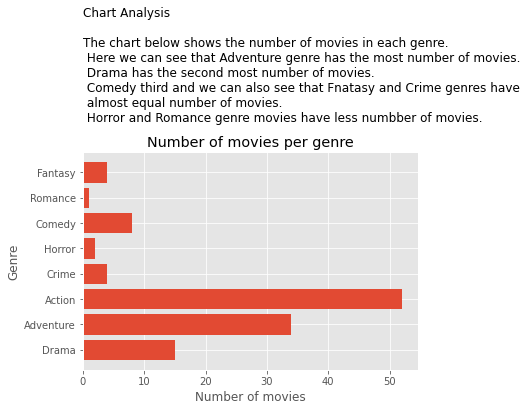

In [264]:
# Create a bar chart of the number of movies in each genre
# plt.subplots(figsize=(17, 17))
plt.barh(list(genre_counts.keys()), genre_counts.values())
plt.xlabel('Number of movies')
plt.ylabel('Genre')
plt.title('Number of movies per genre')
desc = f'Chart Analysis \n\nThe chart below shows the number of movies in each genre.\n Here we can see that Adventure genre has the most number of movies.\n Drama has the second most number of movies.\n Comedy third and we can also see that Fnatasy and Crime genres have \n almost equal number of movies.\n Horror and Romance genre movies have less numbber of movies.'
plt.text(0,9, desc, ha='left', va='baseline', fontsize = "large")
plt.show()

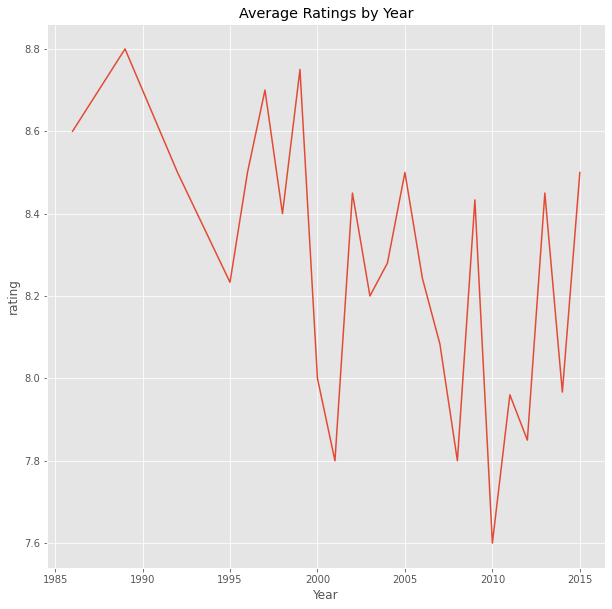

In [265]:
# Calculate average ratings by year
avg_ratings = df.groupby("Start Year")["rating"].mean()

# Create a line chart of average ratings by year
plt.subplots(figsize=(10, 10))
plt.plot(avg_ratings.index, avg_ratings.values)


plt.xlabel("Year")
plt.ylabel("rating")
plt.title("Average Ratings by Year")
# desc = f'Chart Analysis \n\n The chart below shows the Average Ratings of the movies over time. \n The ratings of movies released between the years of 1985 and 1990 \n seems to be the highest, and the lowest in 2010. \n We can observe that the trend or pattern from the graph suggest that the quality \n of movies in the recent years have not quite been more popular \n than the earlier released movies.'
# plt.text(0,0, desc, ha='left', va='top', fontsize = "large")

plt.show()

### Chart Analysis

---



The chart above shows the Average Ratings of the movies over time. The ratings of movies released between the years of 1985 and 1990 seems to be the highest, and the lowest in 2010. We can observe that the trend or pattern from the graph suggest that the quality of movies in the recent years have not quite been more popular than the earlier released movies.

---



In [266]:
df.head()

Name       Year    votes  rating  \
0  Fullmetal Alchemist: Brotherhood  2009–2010  175,254     9.1   
1                     One Punch Man  2015–2019  166,592     8.7   
2                        Death Note  2006–2007  336,663     9.0   
3                      Cowboy Bebop  1998–1999  124,505     8.9   
4                   Hunter x Hunter  2011–2014  107,827     9.0   

               Genre  Action  Adventure  Comedy  Crime  Drama  Fantasy  \
0  Action, Adventure       1          1       0      0      0        0   
1     Action, Comedy       1          0       1      0      0        0   
2       Crime, Drama       0          0       0      1      1        0   
3  Action, Adventure       1          1       0      0      0        0   
4  Action, Adventure       1          1       0      0      0        0   

   Horror  Romance  Start Year  End Year  
0       0        0        2009      2010  
1       0        0        2015      2019  
2       0        0        2006      2007  
3       0        0        1998      1999  
4       0        0        2011      2014



---


### **Converting cleaned Data to csv**

---



In [272]:
df.to_csv('animes_cleaned.csv',index=False)

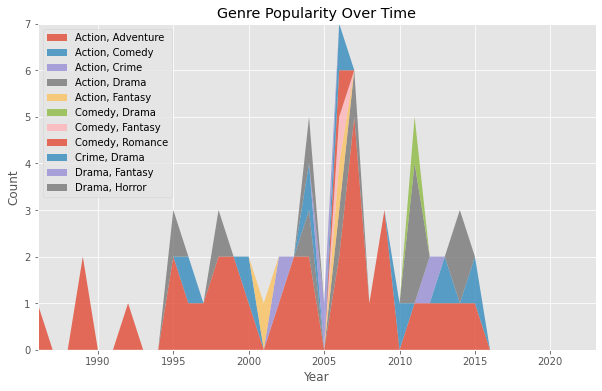

In [268]:
# Create a new DataFrame with genre counts by year
genre_count = df.groupby(["Start Year", "Genre"]).size().unstack(fill_value=0)
years = range(df["Start Year"].min(), df["End Year"].max() + 1)
genre_count = genre_count.reindex(years, fill_value=0)
genre_count = genre_count.interpolate(method="cubic")

# Plot stacked area chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.stackplot(genre_count.index, genre_count.T, baseline="zero", alpha=0.8)



ax.margins(0, 0)
ax.set_title("Genre Popularity Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Count")
ax.legend(genre_count.columns, loc='upper left')

plt.show()


### Chart Analysis

---



The chart above shows the Genre Popularity of Anime Movies over time. We might be able to get some idea on how certain genres have become more or less popular over time and how that might relate to broader cultural trends. We can observe from the chart that Action, Adventure genre has been popular for a long time. We can also see that the spike in Action, Comedy genre in between the years 2005 and 2010 was high. The popularity of Action, Fantasy genre was only seen in between the years 2000 and 2010. 

---



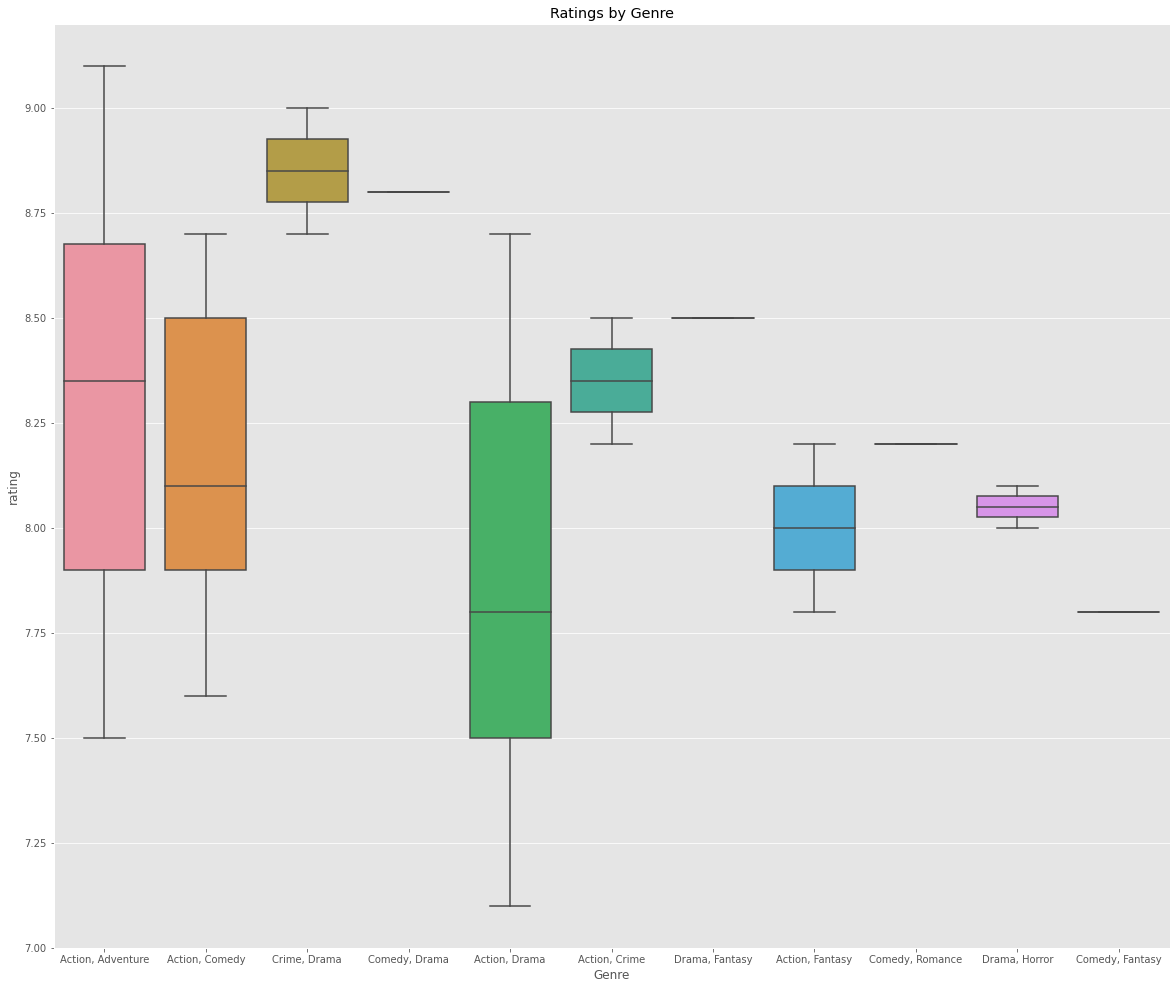

In [269]:
# Create box plots of ratings by genre
plt.subplots(figsize=(20, 17))
sns.boxplot(data=df, x="Genre", y="rating")

plt.title("Ratings by Genre")
plt.xlabel("Genre")
plt.ylabel("rating")
plt.show()

### Chart Analysis

---



The above box plot shows the Ratings of movies with respect to its genres. We can see that Action, Adventure and Action, Drama genres have almost similar amount of ratings given but Action, Adventure has higher ratings than Action, Drama. Crime, Drama has the highest ratings of all the movies but the amount of ratings given are less. Similarly, Comedy, Drama, Drama, Fantasy, Comedy, Romance and COmedy, Fantasy have less amount of ratings.

---



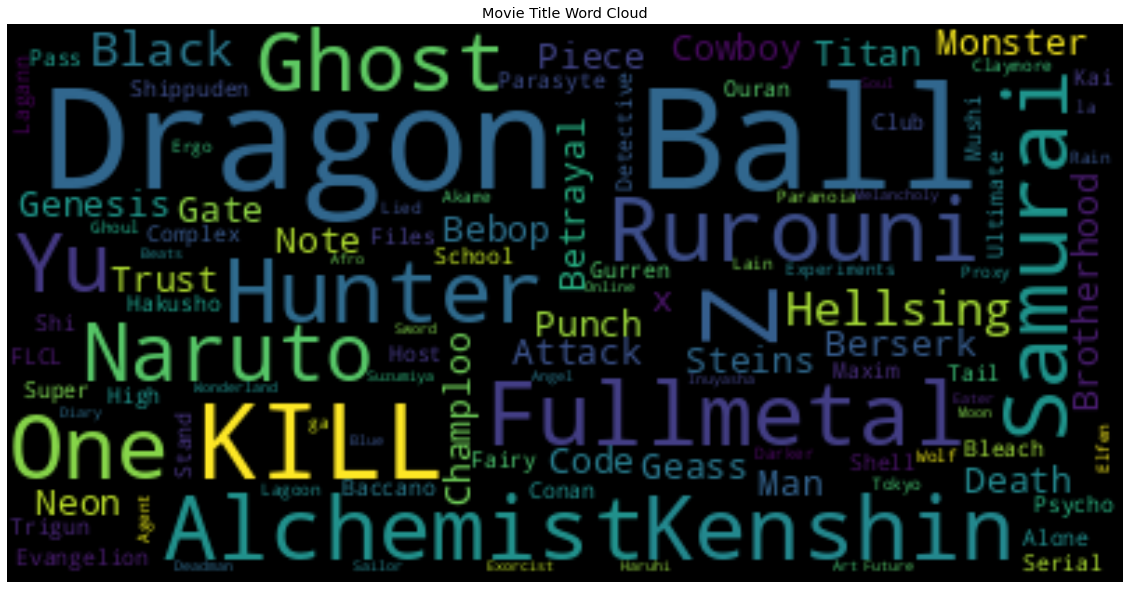

In [270]:
# Create a word cloud of movie titles
text = " ".join(df["Name"])
wordcloud = WordCloud().generate(text)
plt.subplots(figsize=(20, 17))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Movie Title Word Cloud")
plt.show()

### Chart Analysis

---



The word cloud above shows the most common words used in the Anime Movie Titles. We can see that Dragon Ball is the most common. and other common titles are Naruto, Fullmetal Alchemist, Hunter, Kill. This means that the Top Anime Movies contains movies of certain franchises like Dragon Ball, Naruto, Fullmetal ALchemist and HunterxHunter. We can also see some ANime movie names that are less commonly used meaning they have less movies in the list like Bleach, Conan, Evangelion, etc.

---



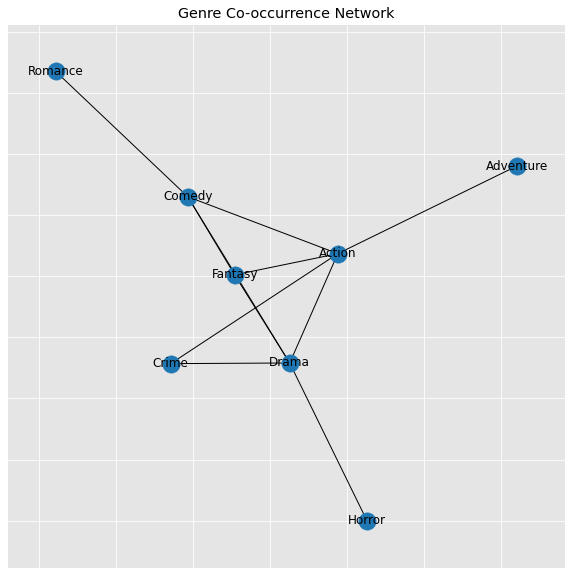

In [271]:
# Create a genre co-occurrence network
edge_list = []
for genres in df["Genre"]:
    genres = genres.split(", ")
    for i in range(len(genres)):
        for j in range(i+1, len(genres)):
            edge_list.append((genres[i], genres[j]))
graph = nx.Graph()
graph.add_edges_from(edge_list)
pos = nx.spring_layout(graph)
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw_networkx(graph, pos=pos, ax=ax)
ax.set_title("Genre Co-occurrence Network")
plt.show()


### Chart Analysis


---


The above graph shows the co-occurence of genres in Anime movies. We can see that Romance genre only co-occurs with Comedy, Horror only co-occurs with Drama, and Adventure genre only co-occurs with Action. Other genres like Comedy, Drama, Fantasy, Action and Crime co-occur frequently in Anime movies.

---

